## Import the libraries

In [1]:
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load the dataset

In [2]:
df = pd.read_csv("data/PlayTennis.csv")
df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 590.0+ bytes


## Data preprocessing

### Convert the data types to category

In [4]:
df = df.astype("category")
df.dtypes

outlook     category
temp        category
humidity    category
windy       category
play        category
dtype: object

### Check the number of unique values in each category

In [5]:
for column in df.columns:
    n_uniques = df[column].nunique()
    print(f"Column {column!r:10} has {n_uniques} unique values!")

Column 'outlook'  has 3 unique values!
Column 'temp'     has 3 unique values!
Column 'humidity' has 2 unique values!
Column 'windy'    has 2 unique values!
Column 'play'     has 2 unique values!


### Convert the columns with 2 categories to 0 and 1

In [6]:
df["humidity"] = df["humidity"].cat.codes
df["windy"] = df["windy"].cat.codes
df["play"] = df["play"].cat.codes
df

,outlook,temp,humidity,windy,play
0,sunny,hot,0,0,0
1,sunny,hot,0,1,0
2,overcast,hot,0,0,1
3,rainy,mild,0,0,1
4,rainy,cool,1,0,1
5,rainy,cool,1,1,0
6,overcast,cool,1,1,1
7,sunny,mild,0,0,0
8,sunny,cool,1,0,1
9,rainy,mild,1,0,1


### Onehot encoding for columns with more than 2 categories

In [7]:
temp = pd.get_dummies(df["temp"], dtype="int", drop_first=True)
outlook = pd.get_dummies(df["outlook"], dtype="int", drop_first=True)
df = df.drop(["outlook", "temp"], axis="columns")
df = pd.concat((outlook, temp, df), axis="columns")
df

,rainy,sunny,hot,mild,humidity,windy,play
0,0,1,1,0,0,0,0
1,0,1,1,0,0,1,0
2,0,0,1,0,0,0,1
3,1,0,0,1,0,0,1
4,1,0,0,0,1,0,1
5,1,0,0,0,1,1,0
6,0,0,0,0,1,1,1
7,0,1,0,1,0,0,0
8,0,1,0,0,1,0,1
9,1,0,0,1,1,0,1


## Select the matrix of features and matrix of labels

In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(f"X {X.shape}")
print(f"y {y.shape}")

X (14, 6)
y (14,)


## Over sampling the dateset

In [9]:
ros = RandomOverSampler(random_state=50)
X, y = ros.fit_resample(X, y)
print(f"X {X.shape}")
print(f"y {y.shape}")

X (18, 6)
y (18,)


## Split the dataset into train and test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test{y_test.shape}")

X_train (14, 6)
X_test (4, 6)
y_train (14,)
y_test(4,)


## Training Naive Bayes classification on training set

In [11]:
nb_clf = MultinomialNB()
nb_clf.fit(X_train, y_train)

MultinomialNB()

## Predicting the test results

In [12]:
y_pred = nb_clf.predict(X_test)
y_pred

array([0, 1, 0, 1], dtype=int8)

## Validation the result


model accurary is: 1.000

confusion matrix:
[[2 0]
 [0 2]]


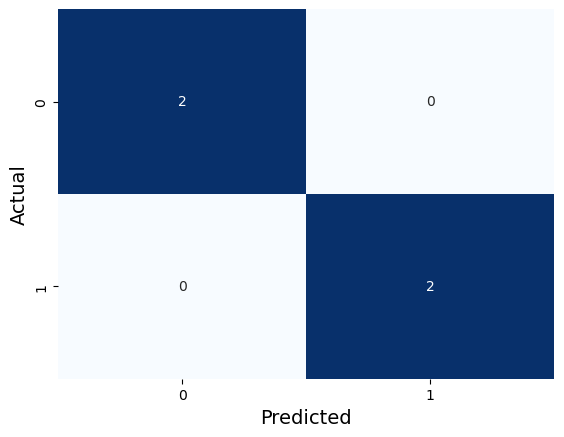

In [13]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\nmodel accurary is: {acc:.3f}")
print(f"\nconfusion matrix:\n{cm}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False)
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14);